In [1]:
import pyabf
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib        as mpl

In [2]:
data_folder = 
DAY = "2021_10_08"  # Manually change
iv_file_ids = ['19', '21', '23', '25', '28', '30', '32']  # Manually change
iv_files = [DAY + "_00{}".format(value) for value in iv_file_ids]

In [3]:
print([str(x) for x in range(16, 33) if x % 2 == 0])
print([str(x) for x in range(16, 33) if x % 2 == 1])

['16', '18', '20', '22', '24', '26', '28', '30', '32']
['17', '19', '21', '23', '25', '27', '29', '31']


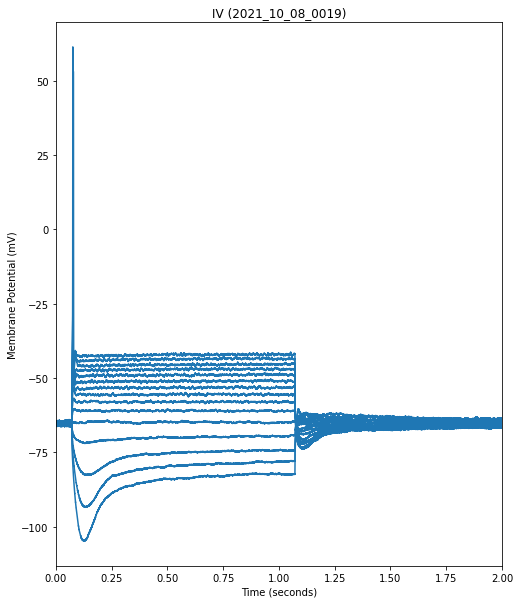

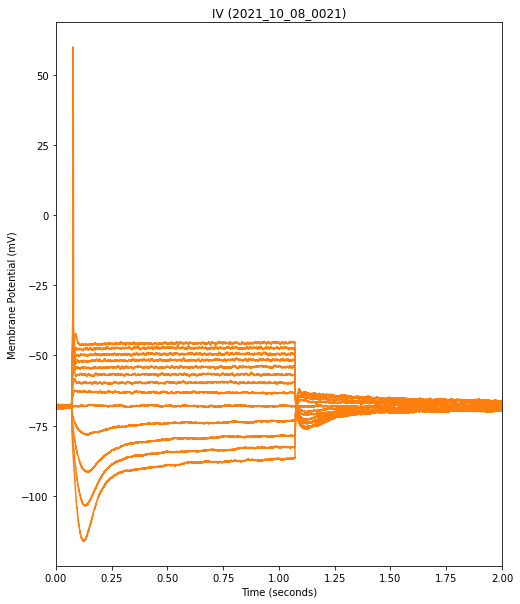

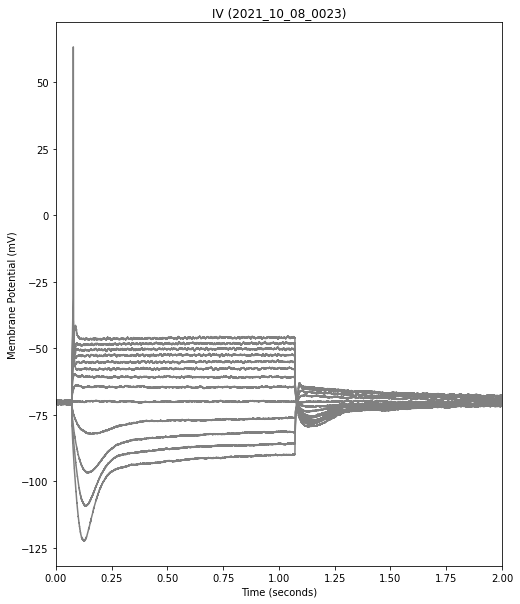

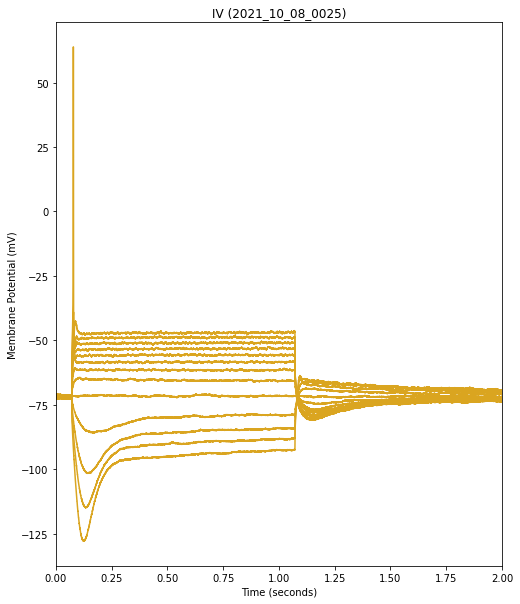

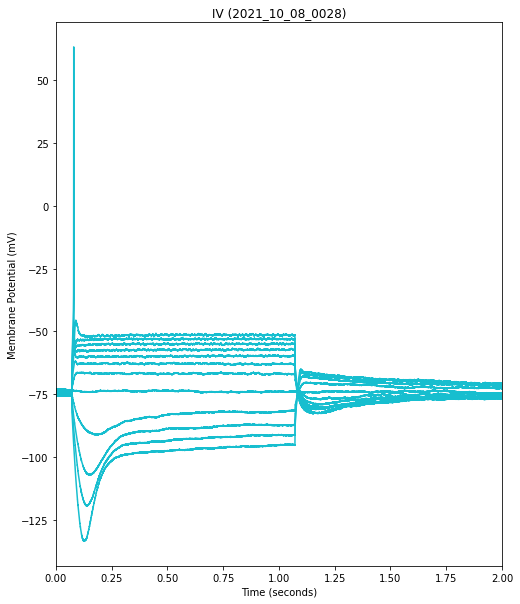

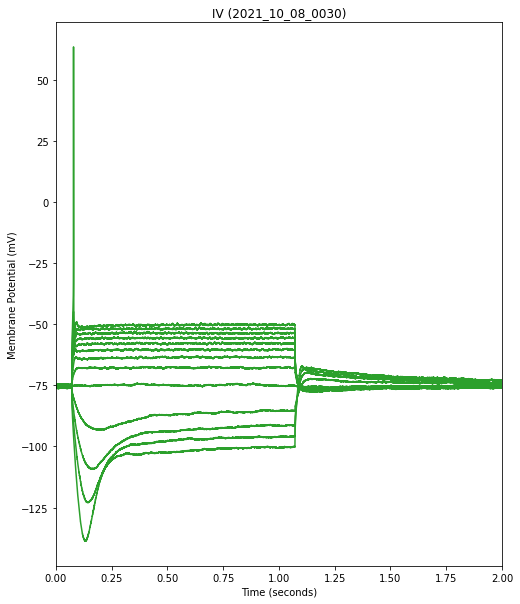

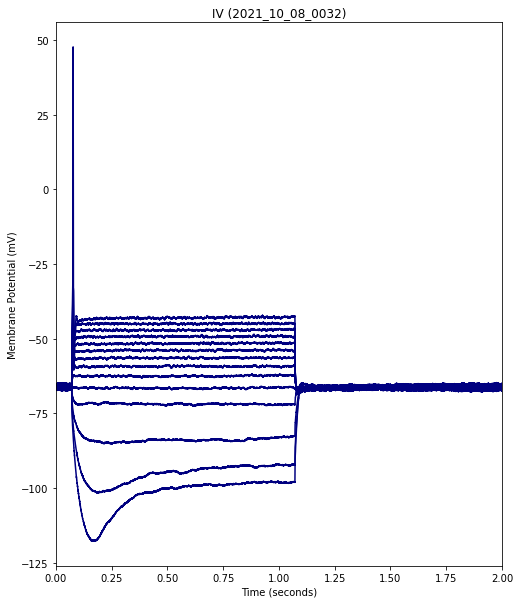

In [4]:
#  use a custom colourmap to create a different colour for every sweep
#  add name of colourmap in: cmap = mpl.cm."HERE" (e.g. viridis,winter,rainbow,magma,BuGn,tab10,cividis)
#  cmap = colourmap as a matrix of colours and then select a part of this matrix as your new colourmap

#cmap = mpl.cm.tab10(np.linspace(0, 1, 20))
#cmap = mpl.colors.ListedColormap(cmap[0:, :-1])  # change first iv_file_name from 0-19
#colours = [cmap(x / len(iv_files)) for x in abf.sweepList]
#colours.reverse()

colours = [
    "tab:blue",
    "tab:orange",
    "grey",
    "goldenrod",
    "tab:cyan",
    "tab:green",
    "navy",
]
for count, iv_file_name in enumerate(iv_files):
    path = data_folder + DAY + "/" + iv_file_name + ".abf"
    abf = pyabf.ABF(path)

    fig = plt.figure(figsize=(8, 10))
    single_colour = colours[count]

    plt.title("IV ({})".format(iv_file_name))
    plt.ylabel(abf.sweepLabelY)
    plt.xlabel(abf.sweepLabelX)

    for i in range(abf.sweepCount):
        abf.setSweep(i)
        plt.plot(
            abf.sweepX,
            abf.sweepY,
            alpha=1,
            # label="sweep {}".format(i + 1),
            color=single_colour,
        )
    plt.xlim([0, 2])
    # plt.legend()

    plt.savefig(data_folder + DAY + "/" + "IV " + iv_file_name, dpi=300, bbox_inches="tight")
    plt.show()

In [5]:
#DAY = "2021_10_07"  # Manually change
cc_file_ids = ['20', '22', '24', '27', '29', '31']  # Manually change
cc_files = [DAY + "_00{}".format(value) for value in cc_file_ids]

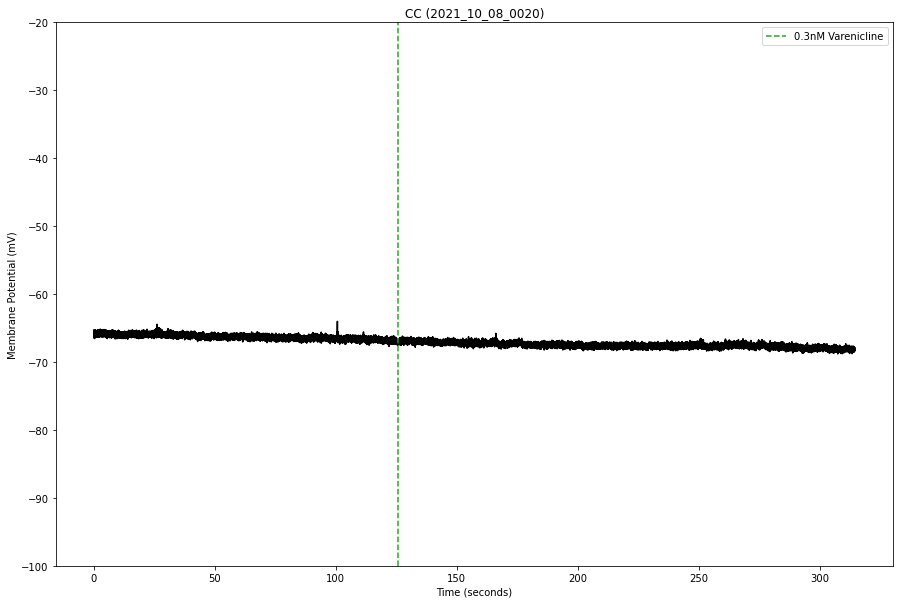

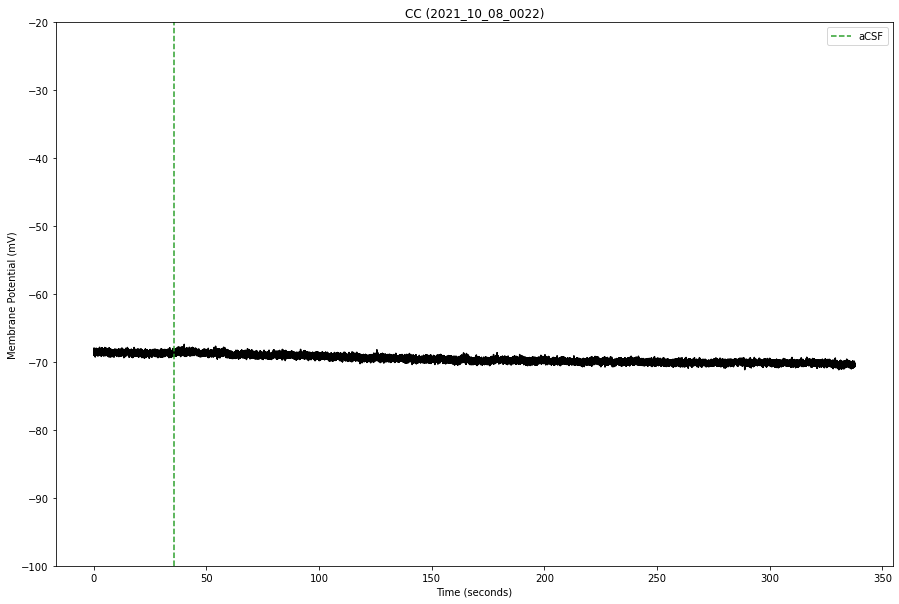

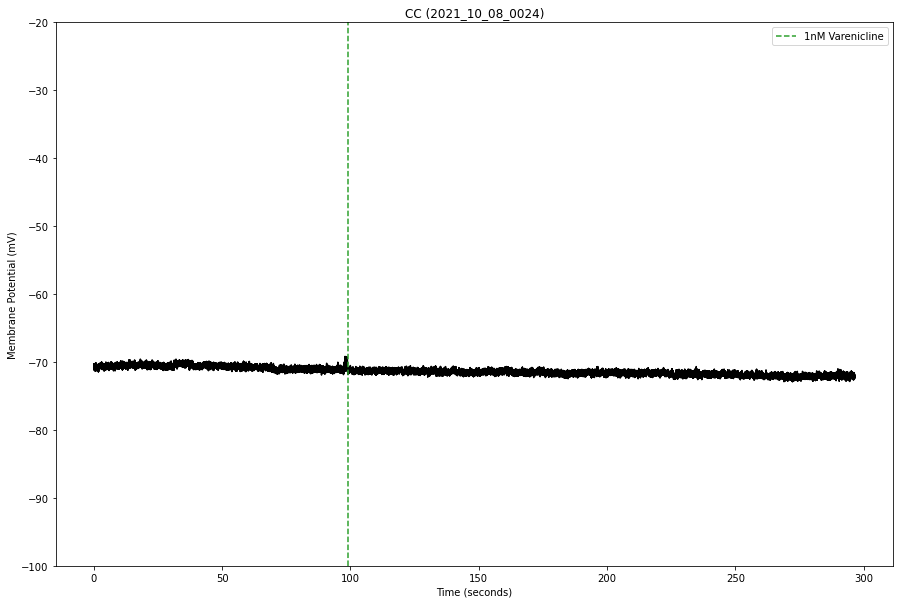

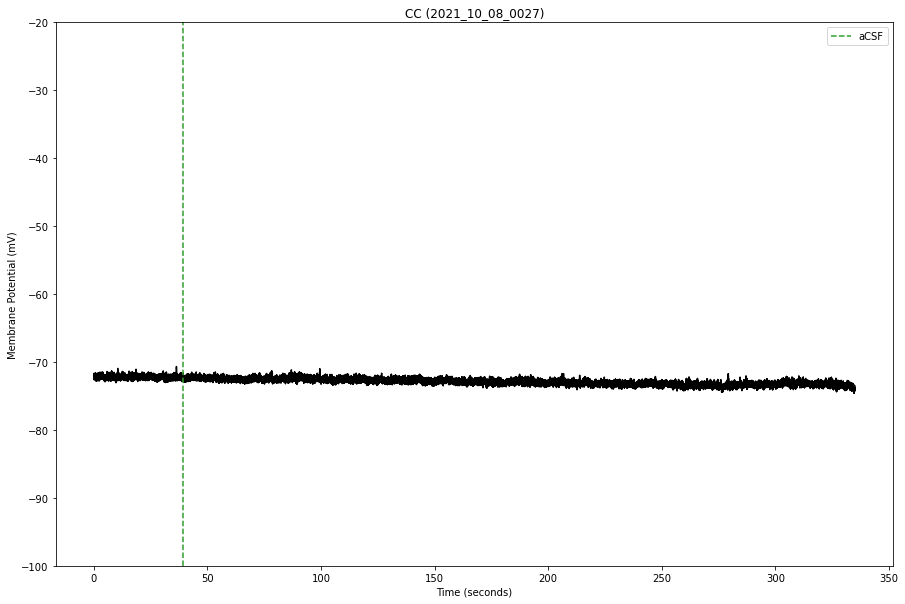

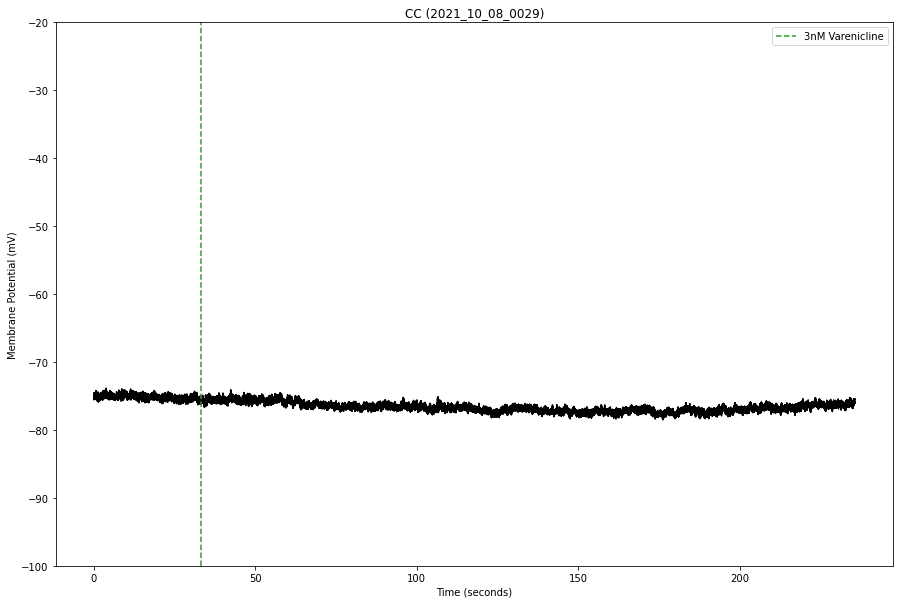

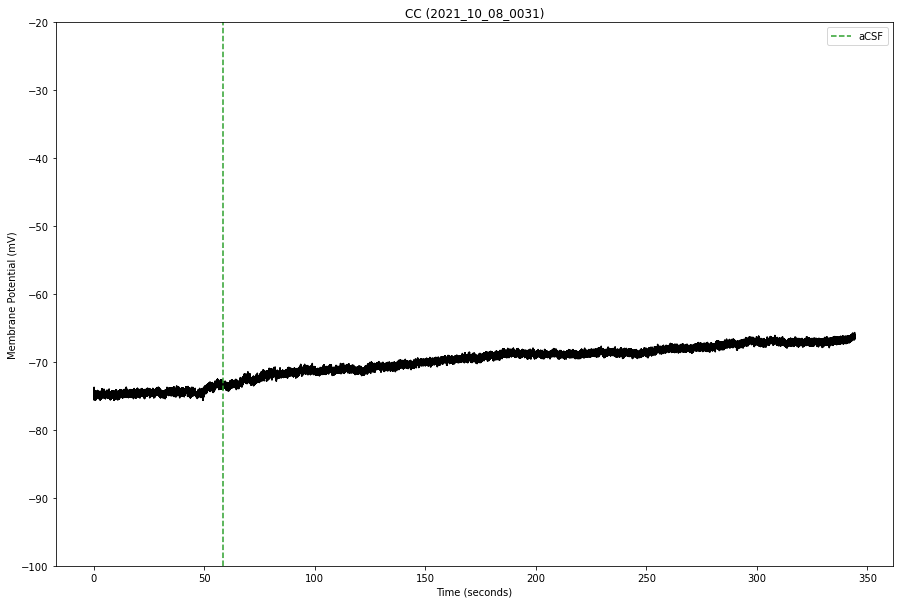

In [6]:
for count, cc_file_name in enumerate(cc_files):
    path = data_folder + DAY + "/" + cc_file_name + ".abf"
    abf = pyabf.ABF(path)

    fig = plt.figure(figsize=(15, 10))

    plt.title("CC ({})".format(cc_file_name))
    plt.ylabel(abf.sweepLabelY)
    plt.xlabel(abf.sweepLabelX)

    for i in range(abf.sweepCount):
        abf.setSweep(i, absoluteTime=True)  # <-- relates to sweepX
        plt.plot(
            abf.sweepX,
            abf.sweepY,
            alpha=1,
            # label="sweep {}".format(i + 1),
            color="black",
        )
    plt.ylim([-100, -20])
    # plt.legend()
    
    for i, tagTimeSec in enumerate(abf.tagTimesSec):
        posX = abf.tagTimesSec[i]
        comment = abf.tagComments[i]
        color = "C{}".format(i+2)
        plt.axvline(posX, label=comment, color=color, ls='--')
    plt.legend()
    
    
    plt.savefig(data_folder + DAY + "/" + "CC " + cc_file_name, dpi=300, bbox_inches="tight")
    plt.show()